In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors, cm 

%matplotlib inline 

In [2]:
df = pd.read_csv('./data/AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df.sample(frac=0.25).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
44978,34485745,Midtown Manhattan Stunner - Private room,261632622,Royalton,Manhattan,Theater District,40.75491,-73.98507,Private room,100,1,3,2019-06-16,3.00,9,318
34758,27551807,The St Marks: A large 7 bedroom 15 mins to Man...,5589082,Jenn & JJ,Brooklyn,Crown Heights,40.67578,-73.94159,Entire home/apt,689,2,18,2019-05-23,1.61,1,340
36888,29328881,"Sunny, spacious 1 Bedroom Apt in the East Village",4205284,Danielle,Manhattan,East Village,40.73122,-73.98652,Entire home/apt,240,2,2,2019-05-23,0.28,1,53
34104,27027786,Prime East Village Manhattan w/ Beautiful Back...,203357182,Thomas,Manhattan,East Village,40.72769,-73.98498,Private room,150,1,3,2019-06-22,2.09,1,27
20512,16333020,Amazing 3BR Triplex Family Apartment w/ Garden,106837455,Lisa,Manhattan,Upper West Side,40.78467,-73.98192,Entire home/apt,900,30,0,NaN,NaN,8,362


Text(0.5, 1.0, 'Позиционирование объявлений по их координатам сгруппированных по атрибуту neighbourhood')

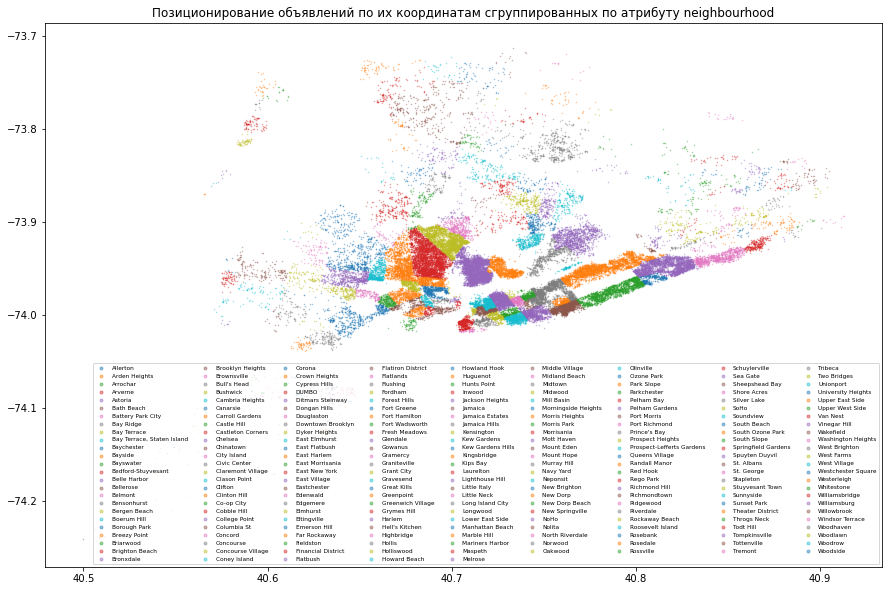

In [5]:
plt.figure(figsize=(15, 10))
for name, group in df.groupby(['neighbourhood']):
    plt.scatter(group['latitude'], group['longitude'], s=0.25, label=name, alpha=0.45)

plt.legend(markerscale=6, ncol=9, fontsize='xx-small')
plt.title('Позиционирование объявлений по их координатам сгруппированных по атрибуту neighbourhood')


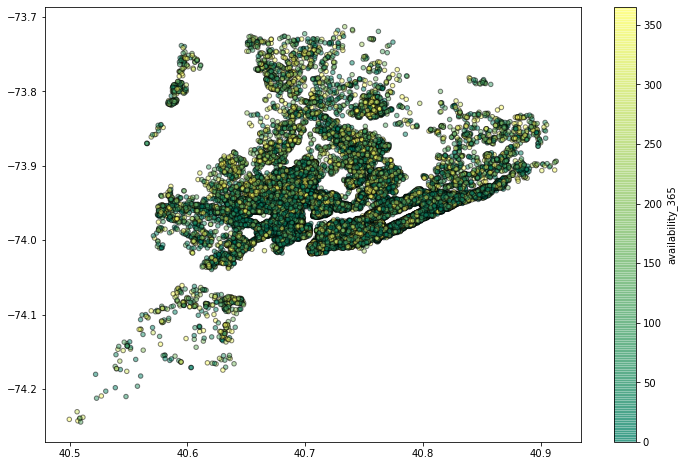

In [9]:
# tst_df = df[(df['availability_365'] < 100)]
tst_df = df
plt.figure(figsize=(12, 8))
plt.scatter(tst_df['latitude'], tst_df['longitude'], c=tst_df['availability_365'], s=20, label=name, alpha=0.5, cmap='summer', edgecolor='black')
plt.colorbar(label='availability_365')

In [16]:
# df['room_type'].nunique()
[column for column in df.columns if df[column].nunique() < 10]


['neighbourhood_group', 'room_type']

In [20]:
pd.get_dummies(df, columns=[column for column in df.columns if df[column].nunique() < 10]).head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,1,365,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,1,194,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
df